In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
plt.rcParams['font.family'] = 'SimSun'
data = pd.read_csv('../newData.csv',encoding='gbk')

# 提取特征和目标变量
X = data[['月份', '日期', '星期几', '季节', '节假日']]
y = data['航线金额']

# 定义决策树数量的范围
tree_numbers = range(20, 401, 20)

# 存储每个决策树数量的交叉验证得分
cv_scores = []

# 交叉验证选择最佳决策树数量
for n in tree_numbers:
    rf_model = RandomForestRegressor(n_estimators=n, random_state=42)
    scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(np.mean(scores))

# 找到最佳决策树数量
best_tree_number = tree_numbers[np.argmax(cv_scores)]
print("Best number of decision trees:", best_tree_number)

Best number of decision trees: 140


D:\anaconda\envs\datawym\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


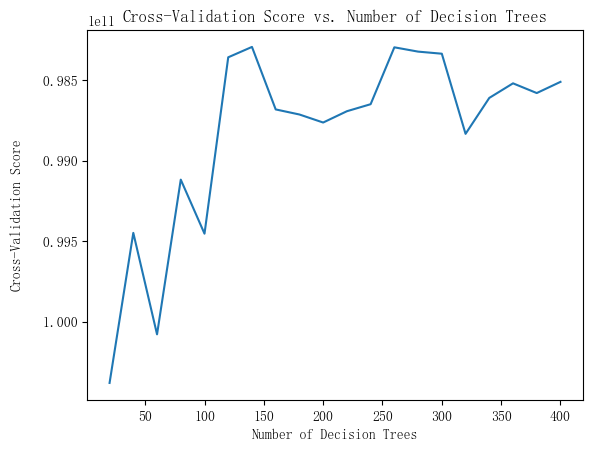

In [2]:
# 绘制折线图
plt.plot(tree_numbers, cv_scores)
plt.xlabel('Number of Decision Trees')
plt.ylabel('Cross-Validation Score')
plt.title('Cross-Validation Score vs. Number of Decision Trees')
plt.show()